In [1]:
%matplotlib inline

In [16]:
from Bio import Phylo
from io import StringIO

import numpy as np

In [26]:
def top_down_pectinate(n=2):
    tree = Phylo.read(StringIO('(:1, :1);'), 'newick', rooted=True)
    top_node = tree.get_terminals()[0]
    for i in range(n-2):
        top_node.split()
        top_node.clades[0].name = ''
        top_node.clades[1].name = ''
        top_node = top_node.clades[0]
    return tree 

tree = top_down_pectinate(512)
print(len(tree.get_terminals()))

512


In [28]:
# %%timeit
vals = []
for internal in tree.get_nonterminals():
    vals.append(np.abs(len(internal.clades[0].get_terminals())-len(internal.clades[1].get_terminals())))
summy = np.sum(vals)


In [29]:
summy

130305

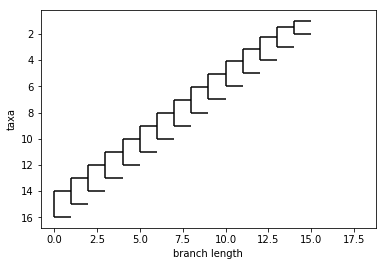

16


In [7]:
Phylo.draw(tree)
print(len(tree.get_terminals()))

In [8]:
def join_at_root(tree_a, tree_b, a_root_bl=1.0, b_root_bl=1.0):
    newick_a = tree_a.format('newick').rstrip(';\n')
    newick_b = tree_b.format('newick').rstrip(';\n')
    combined = '({}:{}, {}:{});'.format(newick_a, a_root_bl, newick_b, b_root_bl)
    tree = Phylo.read(StringIO(combined), 'newick')
    return tree


tree_a = top_down_pectinate(16)
tree_b = top_down_pectinate(4)
tree = join_at_root(tree_a, tree_b)

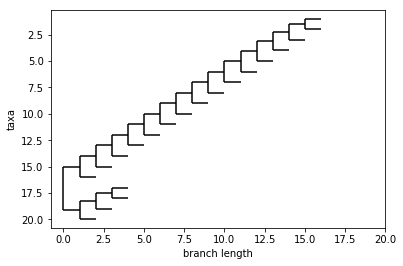

In [9]:
Phylo.draw(tree)

In [13]:
def get_all_stragegy_b(starting_tree):
    tree_list = [starting_tree]
    for i in range(2, int(len(starting_tree.get_terminals())/2)+1):
        tree_a = top_down_pectinate(len(starting_tree.get_terminals())-i)
        tree_b = top_down_pectinate(i)
        tree = join_at_root(tree_a, tree_b)
        tree_list.append(tree)        
        starting_tree = tree

    return tree_list

starting_tree = top_down_pectinate(16)
tree_list = get_all_stragegy_b(starting_tree)

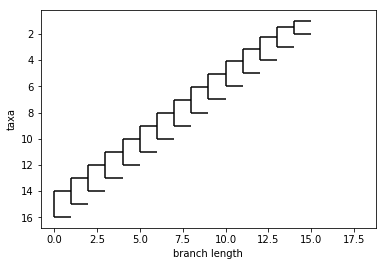

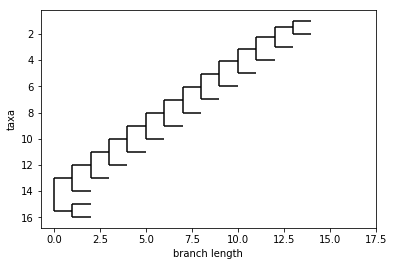

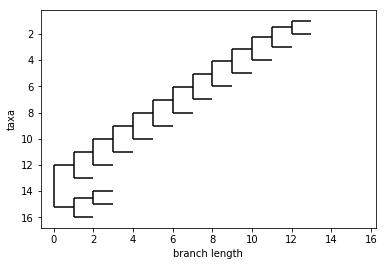

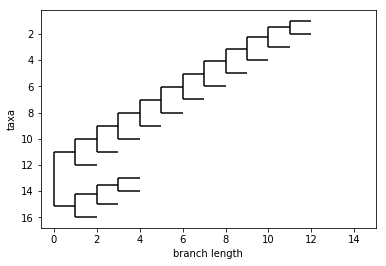

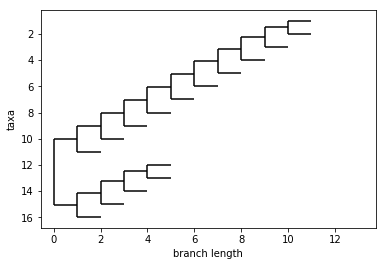

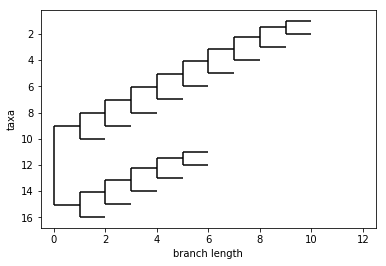

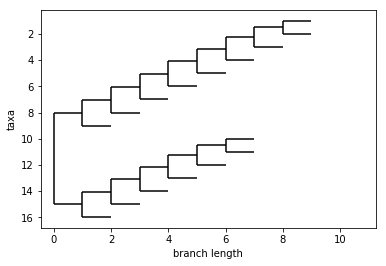

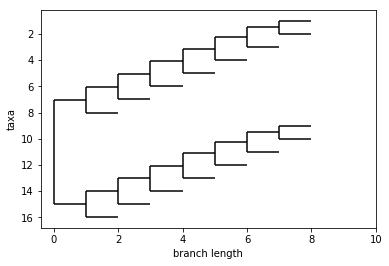

In [12]:
for i in range(len(tree_list)):
    Phylo.draw(tree_list[i])